In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x1, x2):
    return (x1**2 / 2) + (x2**2 / 4)

In [3]:
EPOCHS = 300

In [4]:
n = 1500
n_train = int(n * 0.8)

X = np.random.randint(10, size=(n, 2))
Y = np.array([f(x1, x2) for x1, x2 in X])
    
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

In [5]:
def comp(mod):
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=100,
        decay_rate=0.96
    )
    mod.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
        loss='mean_absolute_error'
    )
    mod.summary()

In [6]:
def graph(train_data, test_data, zoom=0):
    if zoom:
        num = int(len(train_data) * zoom)
        train_data = train_data[num:]
        test_data = test_data[num:]
    plt.plot(train_data, label='train loss')
    plt.plot(test_data, label='test loss')
    plt.title('Training & Validation loss (mae)')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.grid()
    plt.legend()
    plt.show()

In [40]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[2,]),
    tf.keras.layers.Dense(1)
])

comp(model1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                30        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [8]:
history1 = model1.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/300
38/38 [==============================] - 0s 5ms/step - loss: 25.5105 - val_loss: 24.0964
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 23.7658 - val_loss: 22.7074
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 22.5704 - val_loss: 21.6846
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 21.6264 - val_loss: 20.7957
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 20.7287 - val_loss: 19.9094
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 19.8261 - val_loss: 18.9413
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 18.6843 - val_loss: 17.6044
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 17.1020 - val_loss: 15.7610
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 14.9626 - val_loss: 13.4291
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 12.5223 - val_los

Epoch 83/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2452 - val_loss: 4.0656
Epoch 84/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2409 - val_loss: 4.0627
Epoch 85/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2375 - val_loss: 4.0593
Epoch 86/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2339 - val_loss: 4.0557
Epoch 87/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2316 - val_loss: 4.0527
Epoch 88/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2285 - val_loss: 4.0494
Epoch 89/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2249 - val_loss: 4.0463
Epoch 90/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2224 - val_loss: 4.0424
Epoch 91/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2196 - val_loss: 4.0397
Epoch 92/300
38/38 [==============================] - 0s 2ms/step - loss: 4.2169 - val_loss: 4.0365


38/38 [==============================] - 0s 2ms/step - loss: 4.0498 - val_loss: 3.8548
Epoch 246/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0495 - val_loss: 3.8545
Epoch 247/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0493 - val_loss: 3.8543
Epoch 248/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0491 - val_loss: 3.8542
Epoch 249/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0488 - val_loss: 3.8538
Epoch 250/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0486 - val_loss: 3.8536
Epoch 251/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0485 - val_loss: 3.8534
Epoch 252/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0482 - val_loss: 3.8532
Epoch 253/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0480 - val_loss: 3.8530
Epoch 254/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0478 - val_loss: 3.8528
Epoc

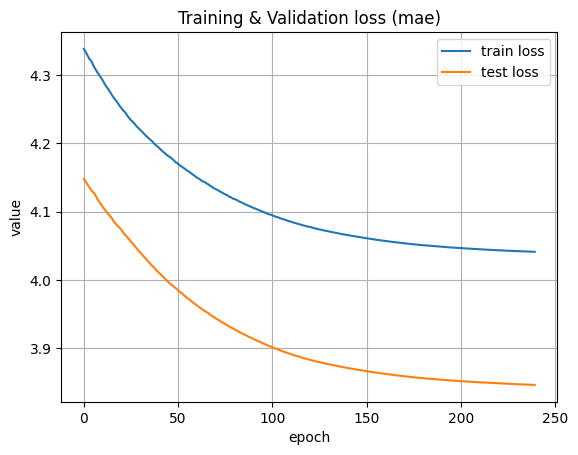

In [37]:
graph(history1.history['loss'], history1.history['val_loss'], 0.2)

In [14]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[2,]),
    tf.keras.layers.Dense(1)
])

comp(model2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [15]:
history2 = model2.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/300
38/38 [==============================] - 0s 4ms/step - loss: 19.8005 - val_loss: 17.1979
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 15.1443 - val_loss: 12.3006
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 10.0969 - val_loss: 7.6259
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 6.3764 - val_loss: 5.3502
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 5.1161 - val_loss: 4.7227
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 4.7939 - val_loss: 4.5430
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 4.6995 - val_loss: 4.4812
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 4.6392 - val_loss: 4.4263
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 4.5930 - val_loss: 4.3803
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 4.5624 - val_loss: 4.3558
Epoc

Epoch 83/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0163 - val_loss: 3.8421
Epoch 84/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0136 - val_loss: 3.8392
Epoch 85/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0100 - val_loss: 3.8354
Epoch 86/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0060 - val_loss: 3.8322
Epoch 87/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0035 - val_loss: 3.8296
Epoch 88/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9996 - val_loss: 3.8248
Epoch 89/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9970 - val_loss: 3.8219
Epoch 90/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9936 - val_loss: 3.8194
Epoch 91/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9908 - val_loss: 3.8161
Epoch 92/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9878 - val_loss: 3.8128


38/38 [==============================] - 0s 3ms/step - loss: 3.8068 - val_loss: 3.6237
Epoch 246/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8065 - val_loss: 3.6234
Epoch 247/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8062 - val_loss: 3.6232
Epoch 248/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8059 - val_loss: 3.6228
Epoch 249/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8056 - val_loss: 3.6224
Epoch 250/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8054 - val_loss: 3.6221
Epoch 251/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8051 - val_loss: 3.6218
Epoch 252/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8049 - val_loss: 3.6215
Epoch 253/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8046 - val_loss: 3.6213
Epoch 254/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8043 - val_loss: 3.6210
Epoc

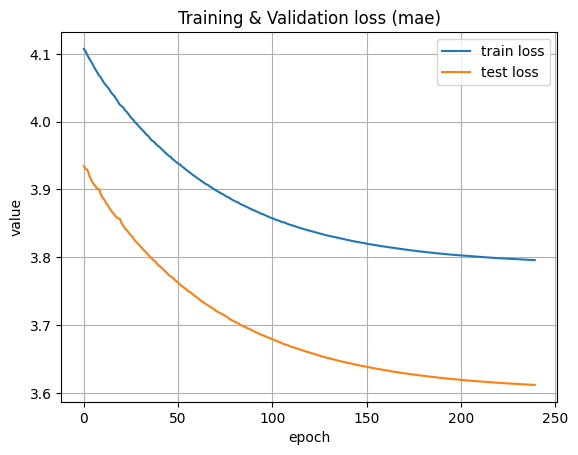

In [17]:
graph(history2.history['loss'], history2.history['val_loss'], 0.2)

In [18]:
print('Model 1 on train & test sets result:')
model1.evaluate(X_train, Y_train)
model1.evaluate(X_test, Y_test)
print('Model 2 on train & test sets result:')
model2.evaluate(X_train, Y_train)
model2.evaluate(X_test, Y_test)

Model 1 on train & test sets result:
10/10 [==============================] - 0s 1ms/step - loss: 3.8459
Model 2 on train & test sets result:
10/10 [==============================] - 0s 976us/step - loss: 3.6116


3.6116390228271484

In [19]:
input1 = tf.keras.Input(shape=[2,])
x = tf.keras.layers.Dense(20, activation='relu')(input1)
input2 = tf.keras.layers.concatenate([input1, x])
x = tf.keras.layers.Dense(1)(input2)
model3 = tf.keras.Model(input1, x)

comp(model3)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 20)           60          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 22)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 1)            23          ['concatenate[0][0]']        

In [20]:
history3 = model3.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/300
38/38 [==============================] - 0s 4ms/step - loss: 15.9152 - val_loss: 13.1909
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 11.3910 - val_loss: 9.1896
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 8.1525 - val_loss: 6.9168
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 6.5557 - val_loss: 5.9793
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 5.7781 - val_loss: 5.4065
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 5.3306 - val_loss: 5.0216
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 5.0352 - val_loss: 4.7209
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 4.8225 - val_loss: 4.5480
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 4.7030 - val_loss: 4.4589
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 4.6222 - val_loss: 4.4034
Epoch 

Epoch 83/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0573 - val_loss: 3.8844
Epoch 84/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0537 - val_loss: 3.8826
Epoch 85/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0511 - val_loss: 3.8773
Epoch 86/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0474 - val_loss: 3.8746
Epoch 87/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0443 - val_loss: 3.8702
Epoch 88/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0420 - val_loss: 3.8679
Epoch 89/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0387 - val_loss: 3.8660
Epoch 90/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0357 - val_loss: 3.8620
Epoch 91/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0330 - val_loss: 3.8597
Epoch 92/300
38/38 [==============================] - 0s 2ms/step - loss: 4.0301 - val_loss: 3.8576


38/38 [==============================] - 0s 2ms/step - loss: 3.8686 - val_loss: 3.6904
Epoch 246/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8683 - val_loss: 3.6900
Epoch 247/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8680 - val_loss: 3.6898
Epoch 248/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8678 - val_loss: 3.6895
Epoch 249/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8675 - val_loss: 3.6893
Epoch 250/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8672 - val_loss: 3.6891
Epoch 251/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8670 - val_loss: 3.6887
Epoch 252/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8668 - val_loss: 3.6886
Epoch 253/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8665 - val_loss: 3.6883
Epoch 254/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8663 - val_loss: 3.6880
Epoc

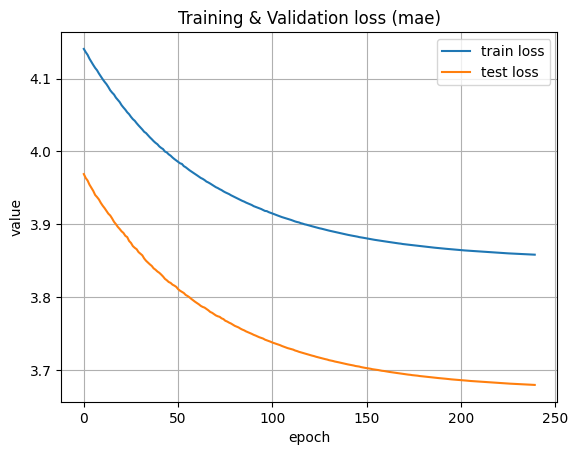

In [22]:
graph(history3.history['loss'], history3.history['val_loss'], 0.2)

In [23]:
input1 = tf.keras.Input(shape=[2,])
x = tf.keras.layers.Dense(10, activation='relu')(input1)
input2 = tf.keras.layers.concatenate([input1, x])
x = tf.keras.layers.Dense(10, activation='relu')(input2)
input3 = tf.keras.layers.concatenate([input2, x])
x = tf.keras.layers.Dense(1)(input3)
model4 = tf.keras.Model(input1, x)

comp(model4)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 10)           30          ['input_2[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 12)           0           ['input_2[0][0]',                
                                                                  'dense_6[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 10)           130         ['concatenate_1[0][0]']    

In [24]:
history4 = model4.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/300
38/38 [==============================] - 0s 4ms/step - loss: 15.5034 - val_loss: 12.7230
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 10.5854 - val_loss: 8.0318
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 6.9325 - val_loss: 5.8568
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 5.5883 - val_loss: 5.1654
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 5.0728 - val_loss: 4.6866
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 4.7827 - val_loss: 4.4866
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 4.6361 - val_loss: 4.3898
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 4.5470 - val_loss: 4.3136
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 4.5026 - val_loss: 4.2829
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 4.4745 - val_loss: 4.2690
Epoch 

Epoch 83/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7928 - val_loss: 3.6079
Epoch 84/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7874 - val_loss: 3.6017
Epoch 85/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7794 - val_loss: 3.5956
Epoch 86/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7741 - val_loss: 3.5898
Epoch 87/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7698 - val_loss: 3.5847
Epoch 88/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7624 - val_loss: 3.5772
Epoch 89/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7559 - val_loss: 3.5733
Epoch 90/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7529 - val_loss: 3.5661
Epoch 91/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7457 - val_loss: 3.5607
Epoch 92/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7404 - val_loss: 3.5539


38/38 [==============================] - 0s 2ms/step - loss: 3.3894 - val_loss: 3.1980
Epoch 246/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3887 - val_loss: 3.1975
Epoch 247/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3881 - val_loss: 3.1970
Epoch 248/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3874 - val_loss: 3.1964
Epoch 249/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3868 - val_loss: 3.1957
Epoch 250/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3863 - val_loss: 3.1952
Epoch 251/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3856 - val_loss: 3.1950
Epoch 252/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3850 - val_loss: 3.1948
Epoch 253/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3847 - val_loss: 3.1934
Epoch 254/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3840 - val_loss: 3.1930
Epoc

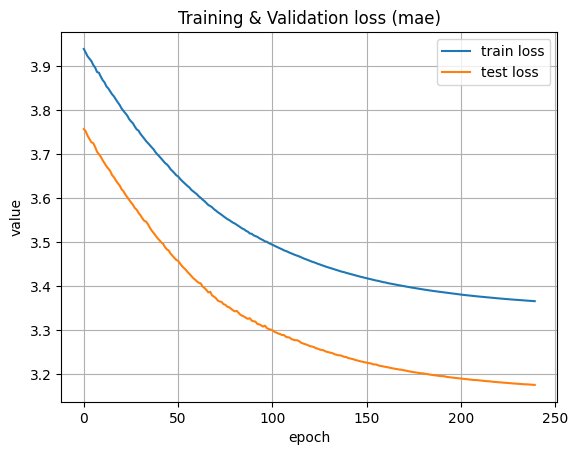

In [26]:
graph(history4.history['loss'], history4.history['val_loss'], 0.2)

In [27]:
print('Model 3 on train & test sets result:')
model3.evaluate(X_train, Y_train)
model3.evaluate(X_test, Y_test)
print('Model 4 on train & test sets result:')
model4.evaluate(X_train, Y_train)
model4.evaluate(X_test, Y_test)

Model 3 on train & test sets result:
10/10 [==============================] - 0s 1ms/step - loss: 3.6799
Model 4 on train & test sets result:
10/10 [==============================] - 0s 1ms/step - loss: 3.1750


3.1749908924102783

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])).astype(np.float32)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])).astype(np.float32)

In [29]:
model5 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(15, activation='relu', input_shape=[1,2]),
    tf.keras.layers.Dense(1)
])

comp(model5)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15)                270       
                                                                 
 dense_9 (Dense)             (None, 1)                 16        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [30]:
history5 = model5.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/300
38/38 [==============================] - 1s 6ms/step - loss: 15.0090 - val_loss: 12.5964
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 10.7562 - val_loss: 8.4733
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 7.2784 - val_loss: 6.1677
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 5.7917 - val_loss: 5.3163
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 5.2678 - val_loss: 4.9507
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 4.9940 - val_loss: 4.6717
Epoch 7/300
38/38 [==============================] - 0s 3ms/step - loss: 4.8118 - val_loss: 4.5466
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 4.7099 - val_loss: 4.4714
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 4.6343 - val_loss: 4.4108
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 4.5765 - val_loss: 4.3617
Epoch 

Epoch 83/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9300 - val_loss: 3.7757
Epoch 84/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9263 - val_loss: 3.7699
Epoch 85/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9228 - val_loss: 3.7672
Epoch 86/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9190 - val_loss: 3.7624
Epoch 87/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9144 - val_loss: 3.7588
Epoch 88/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9116 - val_loss: 3.7548
Epoch 89/300
38/38 [==============================] - 0s 3ms/step - loss: 3.9081 - val_loss: 3.7515
Epoch 90/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9046 - val_loss: 3.7508
Epoch 91/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9016 - val_loss: 3.7445
Epoch 92/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8977 - val_loss: 3.7407


38/38 [==============================] - 0s 2ms/step - loss: 3.6899 - val_loss: 3.5240
Epoch 246/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6895 - val_loss: 3.5237
Epoch 247/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6892 - val_loss: 3.5234
Epoch 248/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6889 - val_loss: 3.5232
Epoch 249/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6886 - val_loss: 3.5227
Epoch 250/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6882 - val_loss: 3.5223
Epoch 251/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6879 - val_loss: 3.5220
Epoch 252/300
38/38 [==============================] - 0s 3ms/step - loss: 3.6876 - val_loss: 3.5218
Epoch 253/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6873 - val_loss: 3.5217
Epoch 254/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6871 - val_loss: 3.5211
Epoc

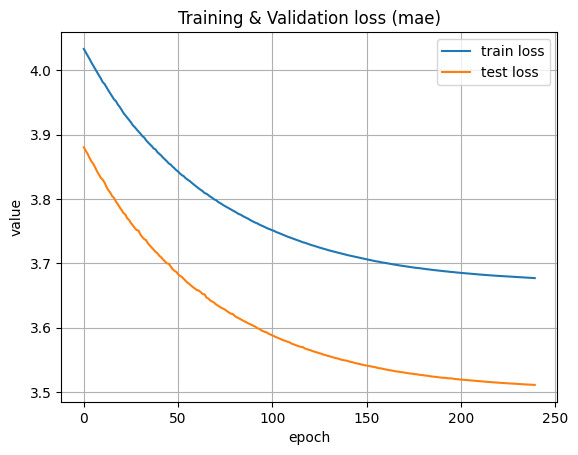

In [32]:
graph(history5.history['loss'], history5.history['val_loss'], 0.2)

In [33]:
model6 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(5, activation='relu', input_shape=[1,2]),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

comp(model6)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5)                 40        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 5)                 30        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [34]:
history6 = model6.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/300
38/38 [==============================] - 1s 6ms/step - loss: 21.6921 - val_loss: 21.3035
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 21.6150 - val_loss: 21.2257
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 21.5391 - val_loss: 21.1491
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 21.4645 - val_loss: 21.0746
Epoch 5/300
38/38 [==============================] - 0s 3ms/step - loss: 21.3927 - val_loss: 21.0019
Epoch 6/300
38/38 [==============================] - 0s 3ms/step - loss: 21.3218 - val_loss: 20.9296
Epoch 7/300
38/38 [==============================] - 0s 3ms/step - loss: 21.2514 - val_loss: 20.8593
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 21.1822 - val_loss: 20.7911
Epoch 9/300
38/38 [==============================] - 0s 3ms/step - loss: 21.1132 - val_loss: 20.7225
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 21.0438 - val_los

Epoch 82/300
38/38 [==============================] - 0s 2ms/step - loss: 5.8299 - val_loss: 5.6574
Epoch 83/300
38/38 [==============================] - 0s 2ms/step - loss: 5.8085 - val_loss: 5.6367
Epoch 84/300
38/38 [==============================] - 0s 3ms/step - loss: 5.7873 - val_loss: 5.6261
Epoch 85/300
38/38 [==============================] - 0s 2ms/step - loss: 5.7683 - val_loss: 5.5974
Epoch 86/300
38/38 [==============================] - 0s 2ms/step - loss: 5.7547 - val_loss: 5.5846
Epoch 87/300
38/38 [==============================] - 0s 3ms/step - loss: 5.7365 - val_loss: 5.5679
Epoch 88/300
38/38 [==============================] - 0s 2ms/step - loss: 5.7188 - val_loss: 5.5473
Epoch 89/300
38/38 [==============================] - 0s 3ms/step - loss: 5.6981 - val_loss: 5.5281
Epoch 90/300
38/38 [==============================] - 0s 3ms/step - loss: 5.6810 - val_loss: 5.5115
Epoch 91/300
38/38 [==============================] - 0s 2ms/step - loss: 5.6661 - val_loss: 5.4964


38/38 [==============================] - 0s 2ms/step - loss: 4.7869 - val_loss: 4.6069
Epoch 245/300
38/38 [==============================] - 0s 3ms/step - loss: 4.7853 - val_loss: 4.6054
Epoch 246/300
38/38 [==============================] - 0s 3ms/step - loss: 4.7839 - val_loss: 4.6042
Epoch 247/300
38/38 [==============================] - 0s 3ms/step - loss: 4.7825 - val_loss: 4.6031
Epoch 248/300
38/38 [==============================] - 0s 2ms/step - loss: 4.7816 - val_loss: 4.6011
Epoch 249/300
38/38 [==============================] - 0s 2ms/step - loss: 4.7797 - val_loss: 4.6000
Epoch 250/300
38/38 [==============================] - 0s 2ms/step - loss: 4.7786 - val_loss: 4.5983
Epoch 251/300
38/38 [==============================] - 0s 3ms/step - loss: 4.7769 - val_loss: 4.5970
Epoch 252/300
38/38 [==============================] - 0s 3ms/step - loss: 4.7757 - val_loss: 4.5958
Epoch 253/300
38/38 [==============================] - 0s 3ms/step - loss: 4.7746 - val_loss: 4.5948
Epoc

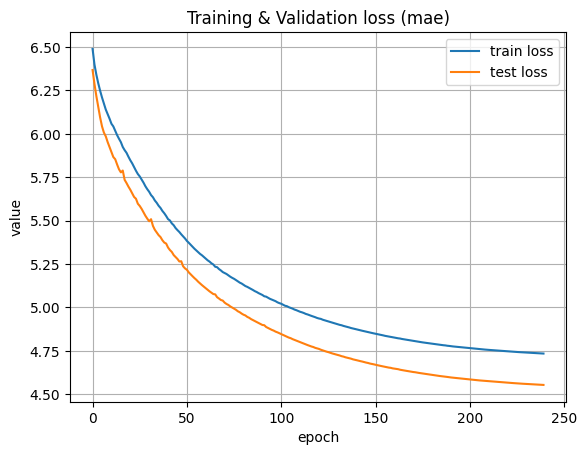

In [36]:
graph(history6.history['loss'], history6.history['val_loss'], 0.2)

In [38]:
print('Model 5 on train & test sets result:')
model5.evaluate(X_train, Y_train)
model5.evaluate(X_test, Y_test)
print('Model 6 on train & test sets result:')
model6.evaluate(X_train, Y_train)
model6.evaluate(X_test, Y_test)

Model 5 on train & test sets result:
10/10 [==============================] - 0s 1ms/step - loss: 3.5108
Model 6 on train & test sets result:
10/10 [==============================] - 0s 1ms/step - loss: 4.5541


4.554060935974121